In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from hublib.ui import Submit
import numpy as np
import ipywidgets as w
from IPython.display import display

<IPython.core.display.Javascript object>

# need this because this example is running in a read-only directory
import os
try:
    os.mkdir('/tmp/submit')
except:
    pass
os.chdir('/tmp/submit')

In [2]:
!rm out.log

rm: cannot remove `out.log': No such file or directory


In [10]:
!ls -l fo

total 588
drwxr-x---  2 mmh public   4096 May  2 10:25 06614372
drwxr-x--- 14 mmh public   4096 May  1 13:50 06614428
-rw-r-----  1 mmh public  22843 Mar  2 11:11 CodeButtons.ipynb
-rw-r-----  1 mmh public  14689 May  1 16:38 RunCommand.ipynb
-rw-r-----  1 mmh public  96834 May  1 16:37 SubmitWidget-NoCache.ipynb
-rw-r-----  1 mmh public  23753 May  1 16:34 SubmitWidget-Parametric.ipynb
-rw-r-----  1 mmh public  18446 May  4 13:02 SubmitWidget.ipynb
-rw-r-----  1 mmh public  74819 Mar  2 10:51 UI_Demo.ipynb
-rw-r-----  1 mmh public  32204 Mar  2 11:10 download.ipynb
-rw-r-----  1 mmh public  13419 May  2 09:50 file_upload.ipynb
drwxr-x---  2 mmh public   4096 May  4 13:04 foo
-rw-r-----  1 mmh public  32132 Apr 30 14:51 listmanager.ipynb
-rw-r-----  1 mmh public  21466 Feb  8 09:21 modal.ipynb
-rw-r-----  1 mmh public   9986 Aug 10  2017 nanohub.png
-rw-r-----  1 mmh public  13311 Mar  2 11:37 pathselect.ipynb
-rw-r-----  1 mmh public 124169 Feb  8 09:21 plotting_gui_demo.ipynb
-rw-r--

# RC Circuit

<img  src="rc.png" style="width: 10%; float: left"/>
A capacitor is charged in series with a resistor.  
The voltage across the capacitor can be expressed as
$V_c(t) = V_0(1-e^{-t/(R*C)})$

Clearly we don't need to use Submit to have this run on a cluster.  But for this example, we want something simple so we can get results quickly.

In [4]:
# this is the function called when the run button is clicked
import os
def my_start(s):
    # get a unique runname 
    rname = s.make_rname(vin.value)
    try:
        os.mkdir('foo')
    except:
        pass
    os.chdir('foo')
    # run locally for this demo, but it works on other venues
    submit_str = '--local /apps/pegtut/current/examples/capacitor_voltage/sim1.py  --Vin=%s' % (vin.value)
    s.run(rname, submit_str)
    os.chdir('..')

In [5]:
# after the run finished, plot the data

def plot_data(s, rdir):
    plt.figure('Capacitor Voltage')  
    plt.clf()  # clear old plot

    # our simulation writes to 'out.log'
    vals = np.loadtxt('%s/out.log' % (rdir))
    x = vals[:,0]
    y = vals[:,1]
    plt.plot(x,y)
    plt.ylabel('$V_c$')
    plt.xlabel('Time (seconds)')
    plt.title('Vin = %.1f' % vin.value)
    plt.show()

In [6]:
# Just to show how it is done, we create two widgets linked
# to give the user different options for entering the input voltage

vin = w.FloatSlider(
    value=10,
    min=0,
    max=50.0,
    step=0.1,
    description='Vin:',
    readout_format='.1f',
)

vin2 = w.BoundedFloatText(
    min=0,
    max=50.0,
    description='Vin:',
)
mylink = w.jslink((vin, 'value'), (vin2, 'value'))

<IPython.core.display.Javascript object>


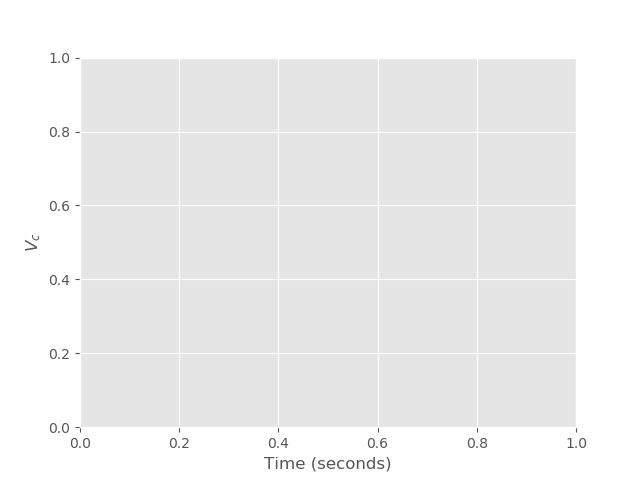

In [7]:
# we want the plot to go here, so create an empty one initially
plt.figure('Capacitor Voltage')
plt.ylabel('$V_c$')
plt.xlabel('Time (seconds)')
plt.show()

In [8]:
display(vin, vin2)

FloatSlider(value=10.0, description='Vin:', max=50.0, readout_format='.1f')

BoundedFloatText(value=0.0, description='Vin:', max=50.0)

In [9]:
Submit(start_func=my_start, done_func=plot_data, cachename='SubmitTest2')

VBox(children=(Button(button_style='success', description='Run', style=ButtonStyle(), tooltip='Run Simulation'),))